<a href="https://colab.research.google.com/github/roncamposj/Computer-Vision-Introductory-Assignments/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Compute harris corner detector in two images [20 %]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


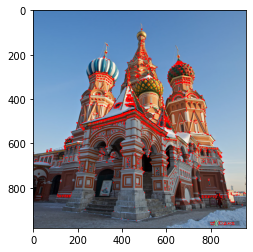

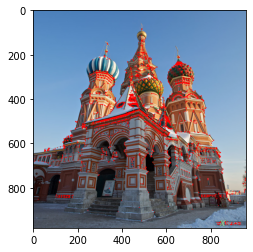

In [ ]:
# Python programe to illustrate
# corner detection with
# Harris Corner Detection Method

# organizing imports
import cv2
import numpy as np

from skimage import io
import matplotlib.pyplot as plt

# Image you are going to use
url = 'http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw6/img1.jpg'
image = io.imread(url)


# modify the data type
# setting to 32-bit floating point
operatedImage = np.float32(image)

# split intwo images
half = np.int(operatedImage.shape[1]/2)
colorimgL = operatedImage[:,:half,:]
colorimgR = operatedImage[:,half:,:]

# convert the input image into
# grayscale color space
imgL = cv2.cvtColor(colorimgL, cv2.COLOR_BGR2GRAY) #Convert to gray scale
imgR = cv2.cvtColor(colorimgR, cv2.COLOR_BGR2GRAY)

# apply the cv2.cornerHarris method
# to detect the corners with appropriate
# values as input parameters

# check: https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=cornerharris#cornerharris
destL = cv2.cornerHarris(imgL, 2, 3, 0.04)    #define the parameters as desired
destR = cv2.cornerHarris(imgR, 2, 3, 0.04)    #define the parameters as desired

# Results are marked through the dilated corners
destL = cv2.dilate(destL, None)
destR = cv2.dilate(destR, None)

# Reverting back to the original image,
# with optimal threshold value
colorimgL[destL > 0.01 * destL.max()]=[255 ,0, 0, ]  #Plot the point as red
colorimgR[destR > 0.01 * destR.max()]=[255 ,0, 0 ]  #Plot the point as red

# the window showing output image with corners
plt.imshow(colorimgL.astype(np.uint8))
plt.show()

plt.imshow(colorimgR.astype(np.uint8))
plt.show()



<br><br>
2. Compute SIFT feature vectors [20%]

In [ ]:
# SIFT license exprired in 2020, then you need a new version of OPenCv to run it.
!pip install opencv-python==4.5.3.56
!pip install opencv-contrib-python==4.5.3.56


     |████████████████████████████████| 49.9 MB 83 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 56.1 MB 1.2 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


4.5.3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


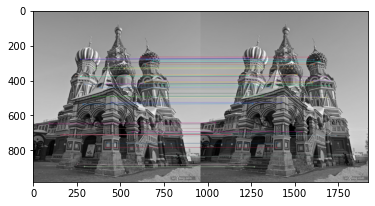

(<matplotlib.image.AxesImage at 0x7f8ae32d3990>, None)

In [ ]:

# organizing imports
import cv2
import numpy as np
print(cv2.__version__)

from skimage import io
import matplotlib.pyplot as plt

url = 'http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw6/img1.jpg'
image = io.imread(url)


# modify the data type
# setting to 32-bit floating point
operatedImage = np.float32(image)

# split intwo images
half = np.int(operatedImage.shape[1]/2)
colorimgL = operatedImage[:,:half,:]
colorimgR = operatedImage[:,half:,:]

# convert the input image into
# grayscale color space
imgL = cv2.cvtColor(colorimgL, cv2.COLOR_BGR2GRAY)
imgR = cv2.cvtColor(colorimgR, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.SIFT_create()

# https://docs.opencv.org/3.4.15/da/df5/tutorial_py_sift_intro.html
keypoints_1, descriptors_1 = sift.detectAndCompute(imgL.astype(np.uint8),None)
keypoints_2, descriptors_2 = sift.detectAndCompute(imgR.astype(np.uint8),None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(imgL.astype(np.uint8), keypoints_1, imgR.astype(np.uint8), keypoints_2, matches[:50], imgR.astype(np.uint8), flags=2)
plt.imshow(img3),plt.show()


<br><br>
3. Extract HOG features of a Image [20%] <br>
Use the following parameters:
orientations= 9
pixels_per_cell = [8,8]
cells_per_block = [3,3]
visualize = True



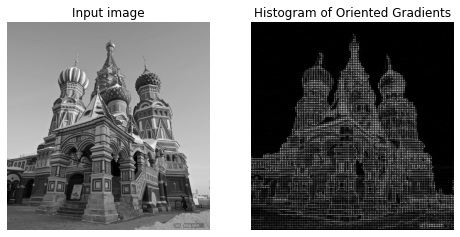

In [ ]:
from skimage.feature import hog
from skimage import data, exposure


# COMPUTE THE HOG
# https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature. hog
fd, hog_image = hog(imgL, orientations=9, pixels_per_cell = [8,8], cells_per_block=[3,3], visualize=True, block_norm='L2-Hys')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(imgL, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


<br><br>
4. Train a HOG detector [20%] <br>

In this example, I will provide you with feature vectors computed exactly as below for the UIUC car dataset. <br>

You will train a model for car. <br>

In [ ]:
# Download the features
!wget http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw6/pickled_data_file.pkl

     

--2022-03-09 12:00:12--  http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw6/pickled_data_file.pkl
Resolving www.cs.ucf.edu (www.cs.ucf.edu)... 132.170.216.243
Connecting to www.cs.ucf.edu (www.cs.ucf.edu)|132.170.216.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20487977 (20M)
Saving to: ‘pickled_data_file.pkl’

pickled_data_file.p 100%[===================>]  19.54M  11.0MB/s    in 1.8s    

2022-03-09 12:00:14 (11.0 MB/s) - ‘pickled_data_file.pkl’ saved [20487977/20487977]



In [ ]:
import pickle
from sklearn.svm import LinearSVC

# load the dataset features
with open('pickled_data_file.pkl', 'rb') as fid:
     data3 = pickle.load(fid)

# Explore the content of training data
print(data3.keys())
print(len(data3['features']))
print(data3['features'][1].shape)
print(len(data3['labels']))

# label = 1 means there is a car   0= no car
print(data3['labels']) 

X = data3['features']
y = data3['labels']

clf = LinearSVC()
print("Training a Linear SVM Classifier") 

# Use the function fit to train the models
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit
clf.fit(X,y)

# save the trained model
with open('model.pkl', 'wb') as fid:
  pickle.dump(clf, fid)

print( 'model trained')

dict_keys(['features', 'labels'])
1050
(2430,)
1050
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<br><br>5. Test your model including non-maxima suppression[20%] <br>





LinearSVC()
(115, 210)
Detection:: Location -> (20,50)
Scale ->  0 | Confidence Score [1.38582409] 

Detection:: Location -> (30,50)
Scale ->  0 | Confidence Score [1.26267996] 

(92, 168)
Detection:: Location -> (10,30)
Scale ->  1 | Confidence Score [1.41030086] 

(74, 135)
Detection:: Location -> (0,20)
Scale ->  2 | Confidence Score [1.07908884] 

(60, 108)
(48, 87)


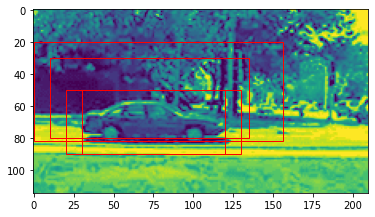

(20, 50, array([1.38582409]), 100, 40)


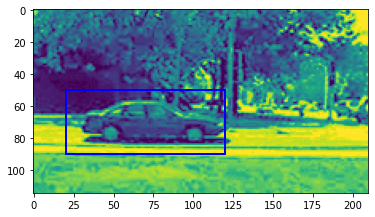

In [ ]:
#hog_image_rescaled
import pickle
from skimage.transform import pyramid_gaussian
from skimage.feature import hog
import matplotlib.patches as patches


# Read the image
min_wdw_sz = (100, 40)
step_size = (10, 10)
downscale = 1.25
visualize_det = True
det_threshold = 0.9

# Load the classifier
with open('model.pkl', 'rb') as fid:
     clf = pickle.load(fid)
print(clf)


# Load test image
url = 'http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw6/test-0.png'
image = io.imread(url)




def sliding_window(image, window_size, step_size):
    '''
    This function returns a patch of the input image `image` of size equal
    to `window_size`. The first image returned top-left co-ordinates (0, 0) 
    and are increment in both x and y directions by the `step_size` supplied.
    So, the input parameters are -
    * `image` - Input Image
    * `window_size` - Size of Sliding Window
    * `step_size` - Incremented Size of Window

    The function returns a tuple -
    (x, y, im_window)
    where
    * x is the top-left x co-ordinate
    * y is the top-left y co-ordinate
    * im_window is the sliding window image
    '''
    for y in range(0, image.shape[0], step_size[1]):
        for x in range(0, image.shape[1], step_size[0]):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])


def overlapping_area(detection_1, detection_2):
    '''
    Function to calculate overlapping area'si
    `detection_1` and `detection_2` are 2 detections whose area
    of overlap needs to be found out.
    Each detection is list in the format ->
    [x-top-left, y-top-left, confidence-of-detections, width-of-detection, height-of-detection]
    The function returns a value between 0 and 1,
    which represents the area of overlap.
    0 is no overlap and 1 is complete overlap.
    Area calculated from ->
    http://math.stackexchange.com/questions/99565/simplest-way-to-calculate-the-intersect-area-of-two-rectangles
    '''
    # Calculate the x-y co-ordinates of the 
    # rectangles
    x1_tl = detection_1[0]
    x2_tl = detection_2[0]
    x1_br = detection_1[0] + detection_1[3]
    x2_br = detection_2[0] + detection_2[3]
    y1_tl = detection_1[1]
    y2_tl = detection_2[1]
    y1_br = detection_1[1] + detection_1[4]
    y2_br = detection_2[1] + detection_2[4]
    # Calculate the overlapping Area
    x_overlap = max(0, min(x1_br, x2_br)-max(x1_tl, x2_tl))
    y_overlap = max(0, min(y1_br, y2_br)-max(y1_tl, y2_tl))
    overlap_area = x_overlap * y_overlap
    area_1 = detection_1[3] * detection_2[4]
    area_2 = detection_2[3] * detection_2[4]
    total_area = area_1 + area_2 - overlap_area
    return overlap_area / float(total_area)

def nms(detections, threshold=.5):
    '''
    This function performs Non-Maxima Suppression.
    `detections` consists of a list of detections.
    Each detection is in the format ->
    [x-top-left, y-top-left, confidence-of-detections, width-of-detection, height-of-detection]
    If the area of overlap is greater than the `threshold`,
    the area with the lower confidence score is removed.
    The output is a list of detections.
    '''
    if len(detections) == 0: 
        return []
    # Sort the detections based on confidence score
    detections = sorted(detections, key=lambda detections: detections[2],
            reverse=True)
    # Unique detections will be appended to this list
    new_detections=[]
    # Append the first detection
    new_detections.append(detections[0])
    # Remove the detection from the original list
    del detections[0]
    # For each detection, calculate the overlapping area
    # and if area of overlap is less than the threshold set
    # for the detections in `new_detections`, append the 
    # detection to `new_detections`.
    # In either case, remove the detection from `detections` list.
    for index, detection in enumerate(detections):
        for new_detection in new_detections:
            if overlapping_area(detection, new_detection) > threshold:
                del detections[index]
                break
        else:
            new_detections.append(detection)
            del detections[index]
    return new_detections

# List to store the detections
detections = []
# The current scale of the image
scale = 0
# Downscale the image and iterate
for im_scaled in pyramid_gaussian(image, downscale=downscale):
    print(im_scaled.shape)
    # This list contains detections at the current scale
    cd = []
    # If the width or height of the scaled image is less than
    # the width or height of the window, then end the iterations.
    if im_scaled.shape[0] < min_wdw_sz[1] or im_scaled.shape[1] < min_wdw_sz[0]:
        break
    for (x, y, im_window) in sliding_window(im_scaled, min_wdw_sz, step_size):
        # print('x,y: ' + str(x) + ' ' +str(y))
        if im_window.shape[0] != min_wdw_sz[1] or im_window.shape[1] != min_wdw_sz[0]:
            continue
        # Calculate the HOG features
        fd= hog(im_window, orientations=9, pixels_per_cell=[8,8], cells_per_block=[3,3], visualize=False, block_norm='L2-Hys')
        
        fd = fd[np.newaxis,:]
        # print(fd.shape)
        pred = clf.predict(fd)
        if pred == 1:
            
            if clf.decision_function(fd) > det_threshold:
              print("Detection:: Location -> (" + str(x)+ "," + str(y) +")")
              print("Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd)))
              detections.append((x, y, clf.decision_function(fd),
                  int(min_wdw_sz[0]*(downscale**scale)),
                  int(min_wdw_sz[1]*(downscale**scale))))
              cd.append(detections[-1])
    # Move the the next scale
    scale+=1

# Display the results before performing NMS
clone = image.copy()
fig, ax = plt.subplots(1)
ax.imshow(clone.astype(np.uint8))
                               
for (x_tl, y_tl, _, w, h) in detections:
    # Draw the detections
    rect = patches.Rectangle((x_tl, y_tl), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
plt.show()

# Perform Non Maxima Suppression and display the results
detections = nms(detections,det_threshold)

fig, ax = plt.subplots(1)
ax.imshow(image.astype(np.uint8))


print(detections[1])

rect2 = patches.Rectangle((20, 50), 100, 40, linewidth=2, edgecolor='b', facecolor='none')
ax.add_patch(rect2)
plt.show()


        